<a href="https://colab.research.google.com/github/ertugrul59/DissertationProject-Msc-_DataScience/blob/master/BoundCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import .mat files

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from scipy.io import loadmat
x = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/run1_translocsimu_1.mat')
y = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/run2_translocsimu_1.mat')

In [ ]:
ch2_Unbound = x['ch2']
ch2_Bound = x['ch2']


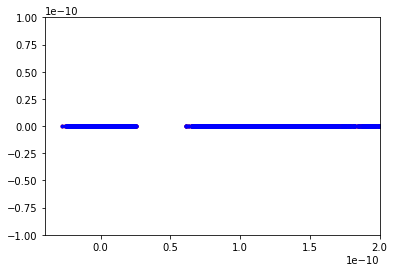

In [ ]:
yUnbound = np.zeros(10000000)
yBound = np.zeros(10000000)

pyplot.plot(ch2_Bound,yUnbound,'r.')
pyplot.plot(ch2_Unbound,yBound,'b.')

axes = pyplot.gca()
axes.set_xlim([-0.00000000004,0.0000000002])
axes.set_ylim([-0.0000000001,0.0000000001])
pyplot.show()






In [ ]:
TotalDatasets = np.concatenate((ch2_Bound, ch2_Unbound), axis=0)

In [ ]:
y_total0 = np.zeros((10000000,1))
y_total1 = np.ones((10000000,1))
y_total = np.concatenate((y_total1, y_total0), axis=0)


In [ ]:
TotalDatasets = np.concatenate((TotalDatasets, y_total), axis=1)

In [ ]:
TotalDatasets

array([[-4.87320045e-12,  1.00000000e+00],
       [-9.09072704e-13,  1.00000000e+00],
       [-2.54182355e-12,  1.00000000e+00],
       ...,
       [-1.86101345e-12,  0.00000000e+00],
       [-9.81288530e-12,  0.00000000e+00],
       [ 1.52988010e-12,  0.00000000e+00]])

In [ ]:
TotalDatasets = TotalDatasets[TotalDatasets[:,0] > 0.5*pow(10, -10)] ##

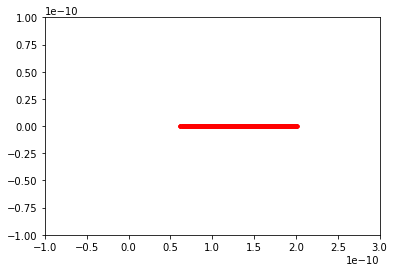

In [ ]:
y = np.zeros(200626)


pyplot.plot(TotalDatasets[:,0], y,'r.')

axes = pyplot.gca()
axes.set_xlim([ -0.0000000001, 0.0000000003])
axes.set_ylim([ -0.0000000001, 0.0000000001])
pyplot.show()



In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(TotalDatasets[:,0], TotalDatasets[:,1], test_size=0.2)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.25) #0.25 x 0.8 = 0.2



In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train.reshape(-1, 1))
#X_train = sc.transform(X_train.reshape(-1, 1))

In [ ]:
#X_train.values.shape(-1,1)
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
X_train = X_train[:len(X_train)-(len(X_train)%700)]
X_val = X_val[:len(X_val)-(len(X_val)%700)]
X_test = X_test[:len(X_test)-(len(X_test)%700)]

In [ ]:
Y_train = Y_train[:len(X_train)]
Y_val = Y_val[:len(X_val)]
Y_test = Y_test[:len(X_test)]

In [ ]:
print(len(X_train)%700)
print(len(X_val)%700)
print(len(X_test)%700)

0
0
0


In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

160300
29400
9800


In [ ]:
print(len(Y_train))
print(len(Y_val))
print(len(Y_test))

160300
29400
9800


In [ ]:
X_train = X_train.reshape(-1, 700)
X_val = X_val.reshape(-1, 700)
X_test = X_test.reshape(-1, 700)

In [ ]:
Y_train = Y_train[:len(X_train)]
Y_val = Y_val[:len(X_val)]
Y_test = Y_test[:len(X_test)]

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

229
42
14


In [ ]:
print(len(Y_train))
print(len(Y_val))
print(len(Y_test))

229
42
14


In [ ]:
#Y_train_bound = np.where(y_train =='Bound', 0, 1)
Y_train_bound = np.where(Y_train == 0, False, True)
Y_val_bound = np.where(Y_val == 0, False, True)
Y_test_bound = np.where(Y_test == 0, False, True)

In [ ]:
Y_train_bound = Y_train_bound.reshape(-1,1)
Y_val_bound = Y_val_bound.reshape(-1,1)
Y_test_bound = Y_test_bound.reshape(-1,1)

In [ ]:
#Y_train_bound.reshape(-1)

In [ ]:
# weights

from sklearn.utils import class_weight

labels = np.array([False, True])

weights = class_weight.compute_class_weight('balanced', labels, Y_train_bound.reshape(-1))


pd.DataFrame({
    "Train": pd.Series(Y_train_bound[:,0]).value_counts() ,
    "Dev": pd.Series(Y_val_bound[:,0]).value_counts() ,
    "Test": pd.Series(Y_test_bound[:,0]).value_counts() ,
    "weights": weights
}) 



,Train,Dev,Test,weights
False,101,24,8,1.133663
True,128,18,6,0.894531


In [ ]:
import sys
#sys.path.append('/content/gdrive/mypythondirectory')
sys.path.append('/content/drive/My Drive/Msc. Project Files/BoundCNN/')

In [ ]:
import keras
from keras import layers
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Embedding
from keras.optimizers import SGD, Adam
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
import time

import Quipu
from Quipu.kerasHelpers import resetHistory, nextEpochNo
from Quipu.tools import normaliseLength
from Quipu import augment


from tensorflow.python.client import device_lib
import tensorflow as tf
tf.test.gpu_device_name()
print(device_lib.list_local_devices())


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 397101893242119975
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5141654842862477137
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7373551709019061217
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17091422933661840185
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
# Hyperparameters

hp = {
    "traceLength" : 700,
    "traceTrim"   : 0,
    "barcodes"    : 8,        # distinct barcode count 
    "normalise_levels": True, # wherther to normalise experiments per batch before feetingh into NN
}

In [ ]:
# Model

input_trace = Input(shape=(hp["traceLength"],1), dtype='float32', name='input')

x = Conv1D(64, 7, padding="same")(input_trace)
x = BatchNormalization(axis=1)(x)
x = Activation('relu')(x)
x = Conv1D(64, 7, padding="same")(x)
x = BatchNormalization(axis=1)(x) 
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.25)(x)

x = Conv1D(128, 5, padding="same")(x)
x = BatchNormalization(axis=1)(x)
x = Activation('relu')(x)
x = Conv1D(128, 5, padding="same")(x)
x = BatchNormalization(axis=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.25)(x)

x = Conv1D(256, 3, padding="same")(x)
x = BatchNormalization(axis=1)(x)
x = Activation('relu')(x)
x = Conv1D(256, 3, padding="same")(x)
x = BatchNormalization(axis=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)


# Bound detector 
#   same model, but single metric output 

output_bound = Dense(1, activation='sigmoid', name='output_barcode')(x)

model = Model(inputs=input_trace, outputs=output_bound)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics = ['accuracy']
)

shapeX = (-1, hp["traceLength"],1); shapeY = (-1, 1)
tensorboard, history = resetHistory()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 700, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 700, 64)           512       
_________________________________________________________________
batch_normalization_1 (Batch (None, 700, 64)           2800      
_________________________________________________________________
activation_1 (Activation)    (None, 700, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 700, 64)           28736     
_________________________________________________________________
batch_normalization_2 (Batch (None, 700, 64)           2800      
_________________________________________________________________
activation_2 (Activation)    (None, 700, 64)           0   

In [ ]:
X_val

array([[1.11606188e-10, 8.77709291e-11, 9.17097706e-11, ...,
        1.15187874e-10, 1.04664745e-10, 1.06793668e-10],
       [1.14581516e-10, 9.76958093e-11, 1.03839376e-10, ...,
        1.01595085e-10, 1.11700008e-10, 1.05162745e-10],
       [1.02916245e-10, 1.09855270e-10, 1.10787914e-10, ...,
        1.01368005e-10, 9.65202113e-11, 1.31216701e-10],
       ...,
       [9.15594135e-11, 1.17005863e-10, 8.95789093e-11, ...,
        1.00960163e-10, 1.11926655e-10, 9.50052701e-11],
       [1.06946994e-10, 9.94684746e-11, 7.80212929e-11, ...,
        1.04024345e-10, 9.18252540e-11, 1.26638094e-10],
       [9.38174490e-11, 9.27937812e-11, 1.03253835e-10, ...,
        9.44296418e-11, 8.46148514e-11, 9.48881793e-11]])

In [ ]:
len(X_val)

42

In [ ]:
Y_val

array([1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0.])

In [ ]:
len(Y_val)

42

In [ ]:
# Main training method

lr = 0.001

for n in range(0,200):
    print("=== Epoch:", n,"===")
    start_time = time.time()
    # data augmentation
    X = np.repeat(X_train, 1, axis=0) # make copies
    Y = np.repeat(Y_train, 1, axis=0)
    X = augment.magnitude(X, std = 0.08) 
    X = augment.stretchDuration(X, std=0.1, probability=0.3)
    X = augment.addNoise( X, std = 0.08) 
    # Learning rate decay
    lr = lr*0.97
    model.optimizer.lr.assign(lr)
    preparation_time = time.time() - start_time
    
    global out_history
    # Fit the model
    out_history = model.fit( 
        x = X.reshape(shapeX), 
        y = Y.reshape(shapeY), 
        batch_size=32, shuffle = True,
        initial_epoch = n,  epochs=n+1, #nextEpochNo(),
        class_weight = weights, # consider commenting it out
        validation_data=(X_val.reshape(shapeX),  Y_val.reshape(shapeY)),
        #callbacks = [tensorboard, history], verbose = 0
    )
    training_time = time.time() - start_time - preparation_time
    
    # Feedback 
    print('  prep time: %3.1f sec' % preparation_time, 
          '  train time: %3.1f sec' % training_time)
    print('  loss: %5.3f' % out_history.history['loss'][0] ,
          '  acc: %5.4f' % out_history.history['accuracy'][0] ,
    #      '  val_acc: %5.4f' % out_history.history['val_acc'][0], 
    #       '  acc: %5.4f' % out_history.history['output_barcode_acc'][0] ,
    #       '  acc (bound): %5.4f' % out_history.history['output_binding_acc'][0] ,
    )
    

=== Epoch: 0 ===
Train on 229 samples, validate on 42 samples
Epoch 1/1
229/229 [==============================] - 7s 33ms/step - loss: 2.7235 - accuracy: 0.4323 - val_loss: 0.7003 - val_accuracy: 0.4286
  prep time: 0.0 sec   train time: 10.6 sec
  loss: 2.724   acc: 0.4323
=== Epoch: 1 ===
Train on 229 samples, validate on 42 samples
Epoch 2/2
229/229 [==============================] - 0s 611us/step - loss: 1.0849 - accuracy: 0.5633 - val_loss: 0.7218 - val_accuracy: 0.4286
  prep time: 0.0 sec   train time: 0.1 sec
  loss: 1.085   acc: 0.5633
=== Epoch: 2 ===
Train on 229 samples, validate on 42 samples
Epoch 3/3
229/229 [==============================] - 0s 643us/step - loss: 1.1789 - accuracy: 0.5066 - val_loss: 0.7078 - val_accuracy: 0.4286
  prep time: 0.0 sec   train time: 0.1 sec
  loss: 1.179   acc: 0.5066
=== Epoch: 3 ===
Train on 229 samples, validate on 42 samples
Epoch 4/4
229/229 [==============================] - 0s 608us/step - loss: 1.0167 - accuracy: 0.5546 - val_los

In [ ]:
#model.save("/home/kmisiunas/Documents/Quipu/models/binding_metric971_2018-04-03_no1.h5")

In [ ]:
# Measure evaluation speed
t0 = time.time()
model.evaluate(x = X_val.reshape(shapeX),   y = Y_val,   verbose=False) 
dt = time.time() - t0
print("Evaluation speed: {:.2f} traces/s ".format(len(X_val) /dt))


Evaluation speed: 3600.04 traces/s 


In [ ]:
print("Train:", model.evaluate(x = X_train.reshape(shapeX), y = Y_train_bound, verbose = False) )
print("Dev  :", model.evaluate(x = X_val.reshape(shapeX),   y = Y_val_bound,   verbose = False) )
print("Test :", model.evaluate(x = X_test.reshape(shapeX),  y = Y_test_bound,  verbose = False) )


Train: [0.6916860703818142, 0.528384268283844]
Dev  : [0.6939241346858797, 0.5]
Test : [0.6882920861244202, 0.5714285969734192]


# Binding Analysis


In [ ]:
# For Binding

def predictionConfidence(prediction):
    "estimates the probability for prediction to be correct"
    if len(prediction.shape) > 1:
        #vector implementation
        return np.apply_along_axis(arr=prediction, axis=1, func1d=predictionConfidence)
    else:
        return np.max([(1-prediction), prediction])
    
def predictionBound(prediction):
    "Returns best prediction"
    return np.round(prediction)
    
def indecesOfbest(predictions, keep = 0.8):
    "gives indeces of the best data, while keeping specified proportion of the data"
    prob = np.apply_along_axis(predictionConfidence, axis=1, arr = predictions)
    return prob.argsort()[ int(len(prob)*(1-keep)):]
    
def evaluateOnlyBest(x, y, keep=0.8, verbose = False):
    "evaluates the best predictions only"
    best = indecesOfbest( model.predict(x) , keep=keep)
    return model.evaluate(x=x[best], y=y[best], verbose = verbose)

def predictOnlyBest(x, y=None, keep=0.8, verbose = False):
    "runs prediction on the best data"
    predictions = model.predict(x, verbose=verbose)
    best = indecesOfbest( predictions, keep=keep)
    if y is None:
        return predictions[best]
    else: 
        return predictions[best], y[best]

In [ ]:
# make sure probability estimators are ready

def estimatePrecisionVsDrop(y_true, x_test):
    "Estimates precision and recalland returns in a table"
    
    predictions_raw = model.predict(x_test.reshape(shapeX))
    
    prediction_bound = predictionBound(predictions_raw).reshape(-1)
    prediction_confidence = predictionConfidence(predictions_raw).reshape(-1)
    y_true_numbers = y_true.reshape(-1)
    # put all in one table
    data = pd.DataFrame({
        "prediction": prediction_bound,
        "label": y_true_numbers,
        "confidence": prediction_confidence,
        "correct": prediction_bound == y_true_numbers
    }).sort_values(by=['confidence'])
    
    length = len(data)
    
    def precission(drop):
        return data.correct[drop:].sum() / (length-drop)
    def recall(drop):
         return data.correct[drop:].sum() / (length)
    def data_remaining(drop):
        return (0.0+length-drop) / length
    
    index = range(0,length, int(length/1000))
    
    return pd.DataFrame({
        "Precission": list([precission(i) for i in  index]),
        "Recall":     list([recall(i) for i in index]),
        "Remaining":  list([data_remaining(i) for i in  index])

    })

In [ ]:
# evaluation

data = estimatePrecisionVsDrop(Y_test_bound,  X_test)

# current model plot on top
pyplot.plot(
    data.Remaining, data.Precission, 
    label='Current model'
)

# human results for comparison (from paper)
pyplot.plot([1.0 - 0.565], [0.931], "X", color='orange')
pyplot.plot([1.0 - 0.192], [0.940], "X", color='red')

# old comparison files
import glob, os
compare_with_files = glob.glob("models/comparison/binding_*.csv")
for file in compare_with_files:
    data2 = pd.read_csv(file)
    pyplot.plot(
        data2.Remaining, data2.Precission, 
        '--',
        label=os.path.basename(file)[:-4]
    )

pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
pyplot.xlabel("Data used")
pyplot.ylabel("Accuracy");


print("Accuracy (best80%):", data.iloc[int( 0.2*len(data) )].Precission)

ValueError: ignored

Text(0.7, 0.15, 'sensing region')

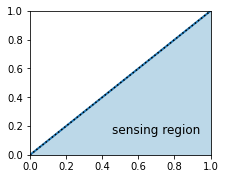

In [ ]:
# run on test set

preditions = model.predict(x=X_test.reshape(shapeX))

def roc_curve_for_binding():
    
    y_true = Y_test.reshape(-1)
    y_pred = preditions.reshape(-1)
    return sklearn.metrics.roc_curve(y_true, y_pred)

pyplot.figure(figsize=(11,9))

fpr, tpr, thresholds = roc_curve_for_binding()
pyplot.subplot(3, 3, 9)
pyplot.fill_between(x=fpr, y1=tpr, y2=0, color = '#BCD8E8')
pyplot.plot(fpr, tpr, linewidth=2)
pyplot.xlim([0,1])
pyplot.ylim([0,1])
pyplot.plot([0,1],[0,1], linestyle='dotted', color='black')
pyplot.text(0.7,0.15, "sensing region", horizontalalignment='center', fontsize=12)

#pyplot.savefig('images/ROC_curves_sensing_region.pdf')

--- 

# Dataset size vs precission




In [ ]:
def createTrainingDataset(size):    
    subset = trainSet.sample(size)
    
    X_train = prepareTraces( subset )
    Y_train_bound =   np.vstack( subset.Bound )

    # prepare categories
    Y_train = Y_train_bound + 0.0
    
    return X_train, Y_train

In [ ]:
def createQuipuNetModel():
    input_trace = Input(shape=(hp["traceLength"],1), dtype='float32', name='input')

    x = Conv1D(64, 7, padding="same")(input_trace)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)
    x = Conv1D(64, 7, padding="same")(x)
    x = BatchNormalization(axis=1)(x) 
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)
    x = Dropout(0.25)(x)

    x = Conv1D(128, 5, padding="same")(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)
    x = Conv1D(128, 5, padding="same")(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)
    x = Dropout(0.25)(x)

    x = Conv1D(256, 3, padding="same")(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)
    x = Conv1D(256, 3, padding="same")(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)


    # Bound detector 
    #   same model, but single metric output 

    output_bound = Dense(1, activation='sigmoid', name='output_barcode')(x)

    model = Model(inputs=input_trace, outputs=output_bound)

    model.compile(
        loss = 'binary_crossentropy',
        optimizer = Adam(lr=0.001),
        metrics = ['accuracy']
    )
    return model

shapeX = (-1, hp["traceLength"],1); 
shapeY = (-1, 1)

In [ ]:
def trainModel():
    lr = 0.001
    for n in range(0,200):
        # data augmentation
        X = np.repeat(X_train, 1, axis=0) # make copies
        Y = np.repeat(Y_train, 1, axis=0)
        X = augment.magnitude(X, std = 0.08) 
        X = augment.stretchDuration(X, std=0.1, probability=0.3)
        X = augment.addNoise( X, std = 0.08) 
        # Learning rate decay
        lr = lr*0.97
        model.optimizer.lr.assign(lr)

        # Fit the model
        out_history = model.fit( 
            x = X.reshape(shapeX), 
            y = Y.reshape(shapeY), 
            batch_size=32, shuffle = True,
            initial_epoch = n,  epochs=n+1, #nextEpochNo(),
            class_weight = weights, # consider commenting it out
            callbacks = [tensorboard, history], verbose = 0
        )


In [ ]:
def assessModel(n):
    _, precision80 = evaluateOnlyBest(X_test.reshape(shapeX), Y_test, keep=0.8, verbose = False)
    _, precision100 = evaluateOnlyBest(X_test.reshape(shapeX), Y_test, keep=1.0, verbose = False)
    return [n, precision100, precision80]

In [ ]:
output = []

def accuracyForDatasetSize(n):
    
    global model, X_train, Y_train
    
    start_time = time.time()
    
    model = createQuipuNetModel()
    
    X_train, Y_train = createTrainingDataset(n)
    
    trainModel()
    
    ans = assessModel(n)
    
    print("===   N=",n,",  time=", (time.time()- start_time)/60 , "(min)   ===")
    
    print("N={}, Acc(100%)={:.3f}, Acc(100%)={:.3f}".format(n, ans[1], ans[2]))
    
    output.append(ans)
    
    

In [ ]:
ns = [100,200,300,400,600,800,1200,2500,3500]

for n in ns:
    accuracyForDatasetSize(n)
    

NameError: ignored

In [ ]:
output_np = np.array(output)

output_pd = pd.DataFrame({
    "n" : output_np[:,0],
    "precision100" : output_np[:,1],
    "precision80" : output_np[:,2],
}).sort_values('n')

output_pd.to_csv('sweep/no_of_samples/2018-05-18_barcode.csv')


IndexError: ignored

In [ ]:
pyplot.plot( output_pd.n, output_pd.precision100 )
pyplot.plot( output_pd.n, output_pd.precision80 )

NameError: ignored

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f = plt.figure()
ax = f.gca()

im = np.random.randn(100,100)
image = plt.imshow(im, interpolation='None', animated=True)

def function_for_animation(frame_index):
    im = np.random.randn(100,100)
    image.set_data(im)
    ax.set_title(str(frame_index))
    return image,

ani = matplotlib.animation.FuncAnimation(f, function_for_animation, interval=200, frames=10, blit=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
